In [ ]:
!pip install biopython matplotlib numpy

from Bio import SeqIO
from Bio import pairwise2
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from math import log2
import matplotlib.pyplot as plt
import numpy as np


=== M. tuberculosis Statistics ===
Genome size: 4411532 bp
GC content: 65.61%
Total coding sequences: 3906
Pseudogenes: 43


=== M. leprae Statistics ===
Genome size: 3268203 bp
GC content: 57.80%
Total coding sequences: 2720
Pseudogenes: 1138



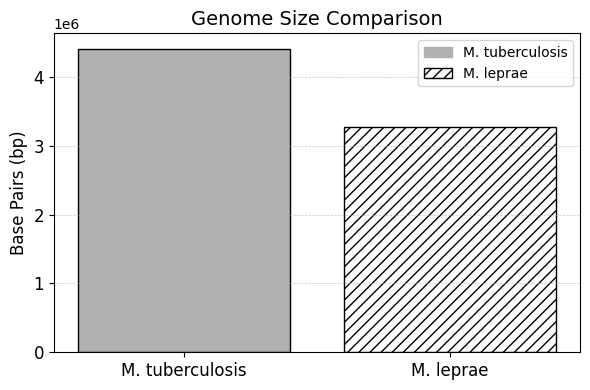

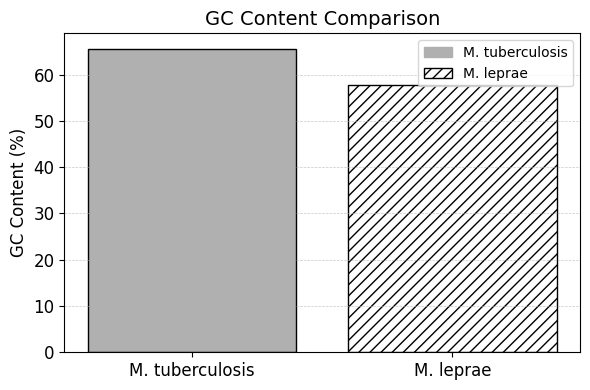

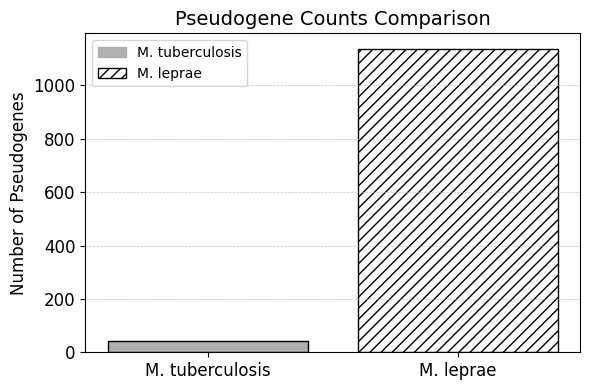

In [37]:
tuberculosis_fasta = "tuberculosis.fasta"
leprae_fasta = "leprae.fasta"
tuberculosis_genbank = "tuberculosis.gb"
leprae_genbank = "leprae.gb"

def calculate_gc_content(sequence):
    gc_count = sequence.count("G") + sequence.count("C")
    return (gc_count / len(sequence)) * 100

def genome_statistics(fasta_file):
    record = SeqIO.read(fasta_file, "fasta")
    length = len(record.seq)
    gc_content = calculate_gc_content(record.seq)
    return length, gc_content

def extract_coding_sequences_with_pseudogenes(genbank_file):
    cds_sequences = []
    pseudogenes = 0
    total_cds = 0

    for record in SeqIO.parse(genbank_file, "genbank"):
        for feature in record.features:
            if feature.type == "CDS":
                total_cds += 1
                cds_sequences.append(feature.location.extract(record).seq)
            elif "pseudo" in feature.qualifiers:
                pseudogenes += 1
            elif "pseudogene" in feature.qualifiers:
                pseudogenes += 1
    return cds_sequences, total_cds, pseudogenes

tb_length, tb_gc = genome_statistics(tuberculosis_fasta)
lep_length, lep_gc = genome_statistics(leprae_fasta)

tb_cds, tb_total_cds, tb_pseudogenes = extract_coding_sequences_with_pseudogenes(tuberculosis_genbank)
lep_cds, lep_total_cds, lep_pseudogenes = extract_coding_sequences_with_pseudogenes(leprae_genbank)

print("\n=== M. tuberculosis Statistics ===")
print(f"Genome size: {tb_length} bp")
print(f"GC content: {tb_gc:.2f}%")
print(f"Total coding sequences: {tb_total_cds}")
print(f"Pseudogenes: {tb_pseudogenes}")
print()

print("\n=== M. leprae Statistics ===")
print(f"Genome size: {lep_length} bp")
print(f"GC content: {lep_gc:.2f}%")
print(f"Total coding sequences: {lep_total_cds}")
print(f"Pseudogenes: {lep_pseudogenes}")
print()

species = ["M. tuberculosis", "M. leprae"]
genome_sizes = [tb_length, lep_length]
gc_contents = [tb_gc, lep_gc]
pseudogenes = [tb_pseudogenes, lep_pseudogenes]

species = ["M. tuberculosis", "M. leprae"]
grey_color = "#B0B0B0"
pattern_color = "#1f77b4"

plt.figure(figsize=(6, 4))
plt.bar(species, genome_sizes, color=[grey_color, "none"], edgecolor="black", hatch=["", "///"])
plt.title("Genome Size Comparison", fontsize=14)
plt.ylabel("Base Pairs (bp)", fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis="y", linestyle="--", linewidth=0.5, alpha=0.7)
plt.legend(handles=[
    mpatches.Patch(color=grey_color, label="M. tuberculosis"),
    mpatches.Patch(facecolor="none", edgecolor="black", hatch="///", label="M. leprae")
], fontsize=10)
plt.tight_layout()
plt.show()
print()

plt.figure(figsize=(6, 4))
plt.bar(species, gc_contents, color=[grey_color, "none"], edgecolor="black", hatch=["", "///"])
plt.title("GC Content Comparison", fontsize=14)
plt.ylabel("GC Content (%)", fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis="y", linestyle="--", linewidth=0.5, alpha=0.7)
plt.legend(handles=[
    mpatches.Patch(color=grey_color, label="M. tuberculosis"),
    mpatches.Patch(facecolor="none", edgecolor="black", hatch="///", label="M. leprae")
], fontsize=10)
plt.tight_layout()
plt.show()
print()

plt.figure(figsize=(6, 4))
plt.bar(species, pseudogenes, color=[grey_color, "none"], edgecolor="black", hatch=["", "///"])
plt.title("Pseudogene Counts Comparison", fontsize=14)
plt.ylabel("Number of Pseudogenes", fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis="y", linestyle="--", linewidth=0.5, alpha=0.7)
plt.legend(handles=[
    mpatches.Patch(color=grey_color, label="M. tuberculosis"),
    mpatches.Patch(facecolor="none", edgecolor="black", hatch="///", label="M. leprae")
], fontsize=10)
plt.tight_layout()
plt.show()


=== Entropy Statistics ===
M. tuberculosis - Mean Entropy: 1.92, Std Dev: 0.03
M. leprae - Mean Entropy: 1.97, Std Dev: 0.02



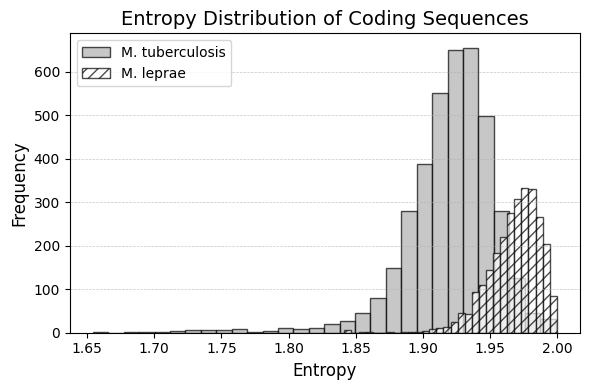



=== Nucleotide Frequencies ===
M. tuberculosis:
  A: 16.79%
  T: 17.31%
  G: 33.66%
  C: 32.25%

M. leprae:
  A: 20.04%
  T: 21.11%
  G: 30.31%
  C: 28.53%



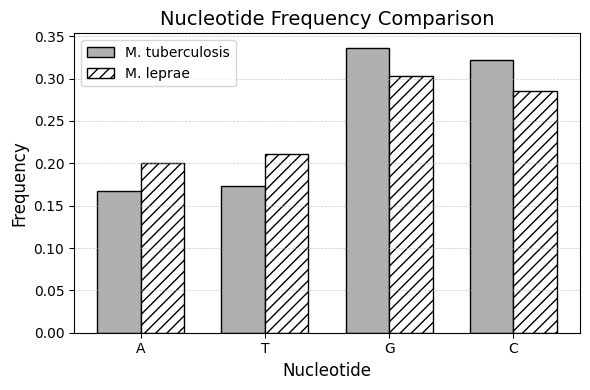



=== Coding Sequence Length Statistics ===
M. tuberculosis - Mean Length: 1013.39, Std Dev: 796.39
M. leprae - Mean Length: 922.16, Std Dev: 692.90



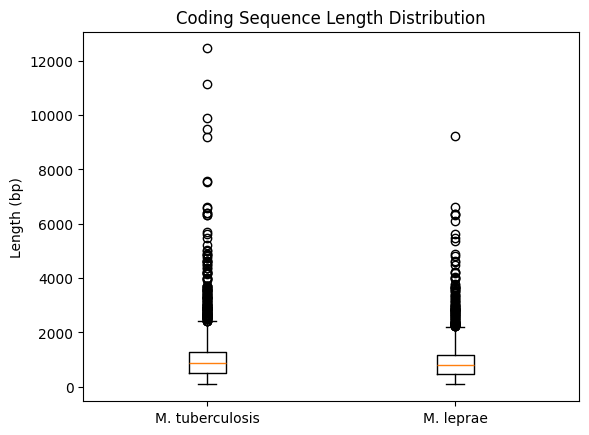

In [42]:
def calculate_entropy(sequence):
    freq = {base: sequence.count(base) / len(sequence) for base in "ACGT"}
    return -sum(p * log2(p) for p in freq.values() if p > 0)

tb_entropy = [calculate_entropy(str(seq)) for seq in tb_cds]
lep_entropy = [calculate_entropy(str(seq)) for seq in lep_cds]

print("\n=== Entropy Statistics ===")
print(f"M. tuberculosis - Mean Entropy: {np.mean(tb_entropy):.2f}, Std Dev: {np.std(tb_entropy):.2f}")
print(f"M. leprae - Mean Entropy: {np.mean(lep_entropy):.2f}, Std Dev: {np.std(lep_entropy):.2f}")
print()

plt.figure(figsize=(6, 4))

plt.hist(tb_entropy, bins=30, alpha=0.7, label="M. tuberculosis", color="#B0B0B0", edgecolor="black")

plt.hist(lep_entropy, bins=30, alpha=0.7, label="M. leprae", color="white", edgecolor="black", hatch="///")

plt.title("Entropy Distribution of Coding Sequences", fontsize=14)
plt.xlabel("Entropy", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.legend(fontsize=10)

plt.grid(axis="y", linestyle="--", linewidth=0.5, alpha=0.7)

plt.tight_layout()
plt.show()
print()

def nucleotide_frequencies(sequences):
    total_counts = {"A": 0, "T": 0, "G": 0, "C": 0}
    total_bases = 0
    for seq in sequences:
        for base in total_counts:
            total_counts[base] += seq.count(base)
        total_bases += len(seq)
    return {base: count / total_bases for base, count in total_counts.items()}

tb_nucleotide_freqs = nucleotide_frequencies(tb_cds)
lep_nucleotide_freqs = nucleotide_frequencies(lep_cds)

print("\n=== Nucleotide Frequencies ===")
print("M. tuberculosis:")
for base, freq in tb_nucleotide_freqs.items():
    print(f"  {base}: {freq:.2%}")
print()
print("M. leprae:")
for base, freq in lep_nucleotide_freqs.items():
    print(f"  {base}: {freq:.2%}")

print()

species = ["A", "T", "G", "C"]
tb_freqs = [tb_nucleotide_freqs[base] for base in species]
lep_freqs = [lep_nucleotide_freqs[base] for base in species]

x = np.arange(len(species))
width = 0.35

fig, ax = plt.subplots(figsize=(6, 4))

rects1 = ax.bar(x - width/2, tb_freqs, width, label="M. tuberculosis", color="#B0B0B0", edgecolor="black")

rects2 = ax.bar(x + width/2, lep_freqs, width, label="M. leprae", color="white", edgecolor="black", hatch="///")

ax.set_xlabel("Nucleotide", fontsize=12)
ax.set_ylabel("Frequency", fontsize=12)
ax.set_title("Nucleotide Frequency Comparison", fontsize=14)
ax.set_xticks(x)
ax.set_xticklabels(species, fontsize=10)
ax.legend(fontsize=10)

ax.grid(axis="y", linestyle="--", linewidth=0.5, alpha=0.7)

plt.tight_layout()
plt.show()
print()

tb_cds_lengths = [len(seq) for seq in tb_cds]
lep_cds_lengths = [len(seq) for seq in lep_cds]

print("\n=== Coding Sequence Length Statistics ===")
print(f"M. tuberculosis - Mean Length: {np.mean(tb_cds_lengths):.2f}, Std Dev: {np.std(tb_cds_lengths):.2f}")
print(f"M. leprae - Mean Length: {np.mean(lep_cds_lengths):.2f}, Std Dev: {np.std(lep_cds_lengths):.2f}")
print()

plt.boxplot([tb_cds_lengths, lep_cds_lengths], labels=["M. tuberculosis", "M. leprae"])
plt.title("Coding Sequence Length Distribution")
plt.ylabel("Length (bp)")
plt.show()


=== Energetics Analysis (GC Energy) ===
M. tuberculosis - Mean GC Energy: 0.65, Std Dev: 0.03
M. leprae - Mean GC Energy: 0.58, Std Dev: 0.04



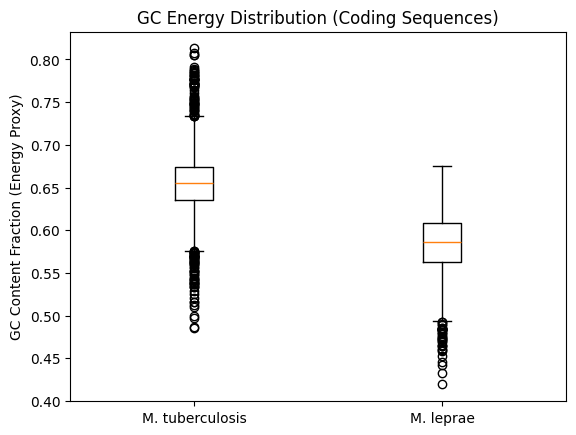

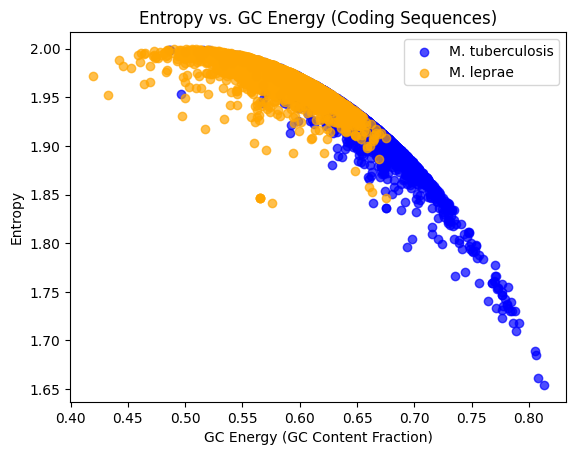



=== Correlation Analysis ===
M. tuberculosis - Correlation between Entropy and GC Energy: -0.93
M. leprae - Correlation between Entropy and GC Energy: -0.76



In [45]:
def calculate_gc_energy(sequence):
    gc_count = sequence.count("G") + sequence.count("C")
    return gc_count / len(sequence)

tb_gc_energy = [calculate_gc_energy(str(seq)) for seq in tb_cds]
lep_gc_energy = [calculate_gc_energy(str(seq)) for seq in lep_cds]

print("\n=== Energetics Analysis (GC Energy) ===")
print(f"M. tuberculosis - Mean GC Energy: {np.mean(tb_gc_energy):.2f}, Std Dev: {np.std(tb_gc_energy):.2f}")
print(f"M. leprae - Mean GC Energy: {np.mean(lep_gc_energy):.2f}, Std Dev: {np.std(lep_gc_energy):.2f}")
print()

plt.boxplot([tb_gc_energy, lep_gc_energy], labels=["M. tuberculosis", "M. leprae"])
plt.title("GC Energy Distribution (Coding Sequences)")
plt.ylabel("GC Content Fraction (Energy Proxy)")
plt.show()
print()

plt.scatter(tb_gc_energy, tb_entropy, alpha=0.7, label="M. tuberculosis", color="blue")
plt.scatter(lep_gc_energy, lep_entropy, alpha=0.7, label="M. leprae", color="orange")
plt.title("Entropy vs. GC Energy (Coding Sequences)")
plt.xlabel("GC Energy (GC Content Fraction)")
plt.ylabel("Entropy")
plt.legend()
plt.show()
print()

tb_corr = np.corrcoef(tb_gc_energy, tb_entropy)[0, 1]
lep_corr = np.corrcoef(lep_gc_energy, lep_entropy)[0, 1]

print("\n=== Correlation Analysis ===")
print(f"M. tuberculosis - Correlation between Entropy and GC Energy: {tb_corr:.2f}")
print(f"M. leprae - Correlation between Entropy and GC Energy: {lep_corr:.2f}")
print()

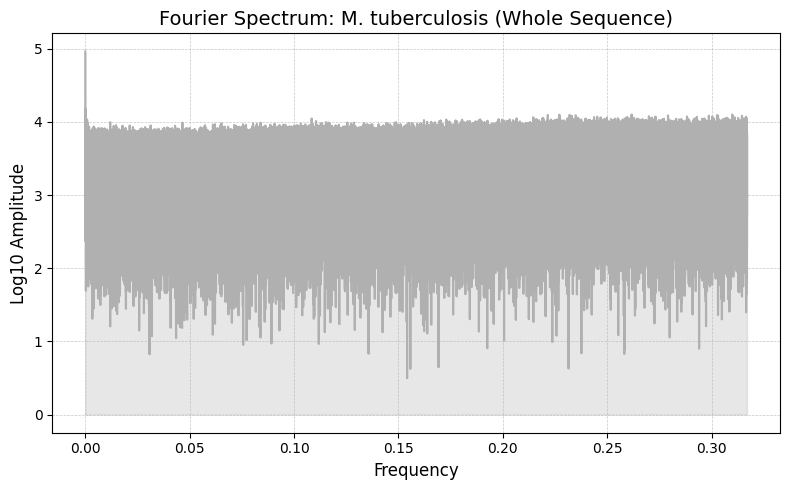

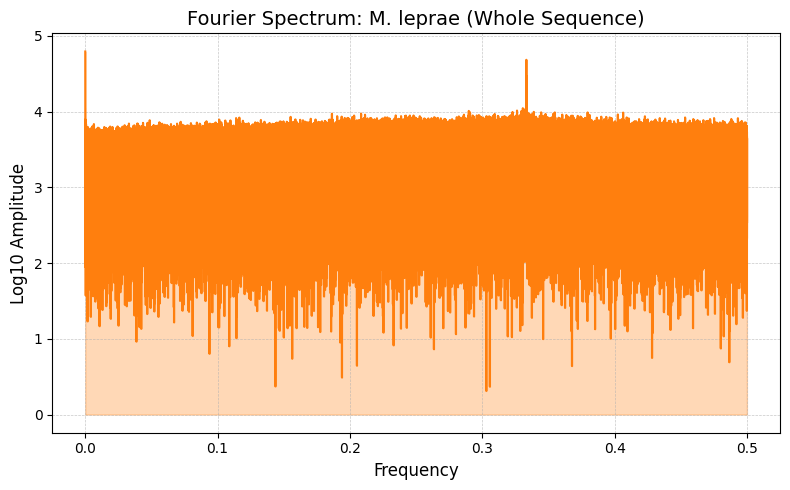

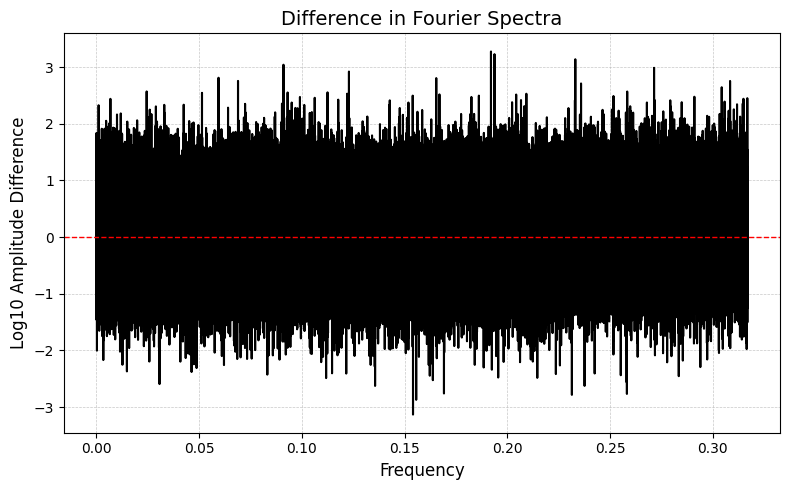

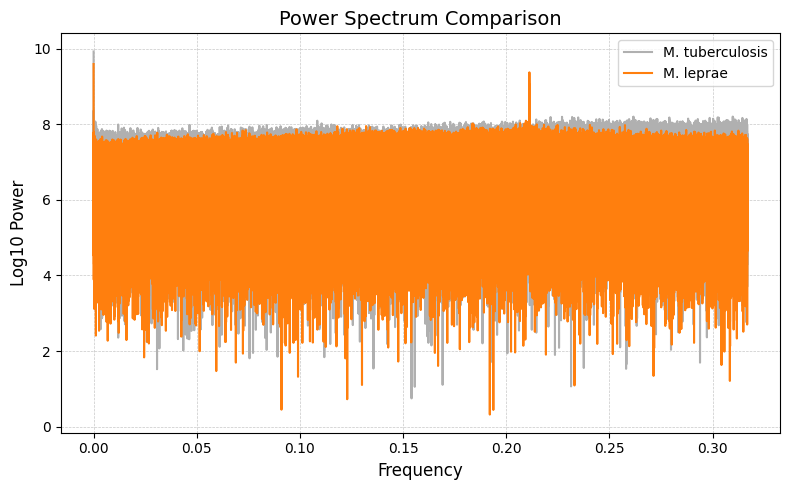

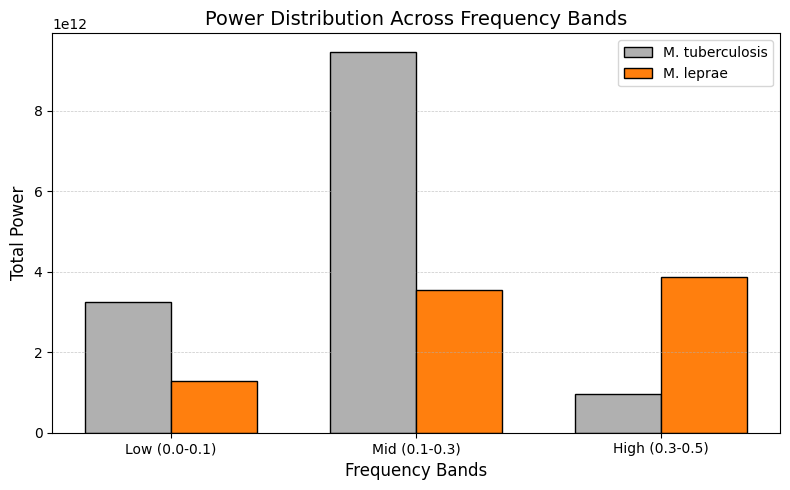

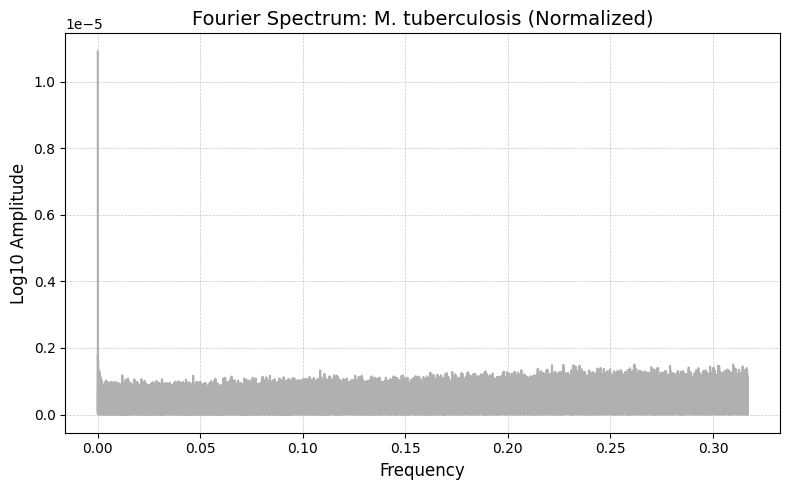

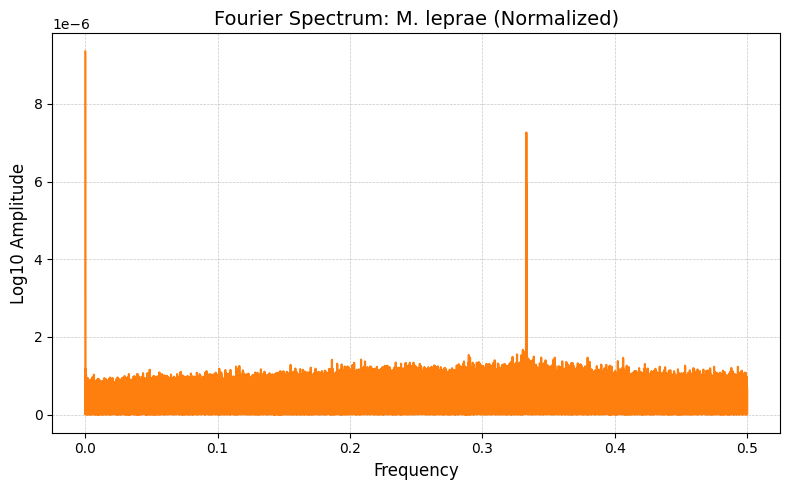

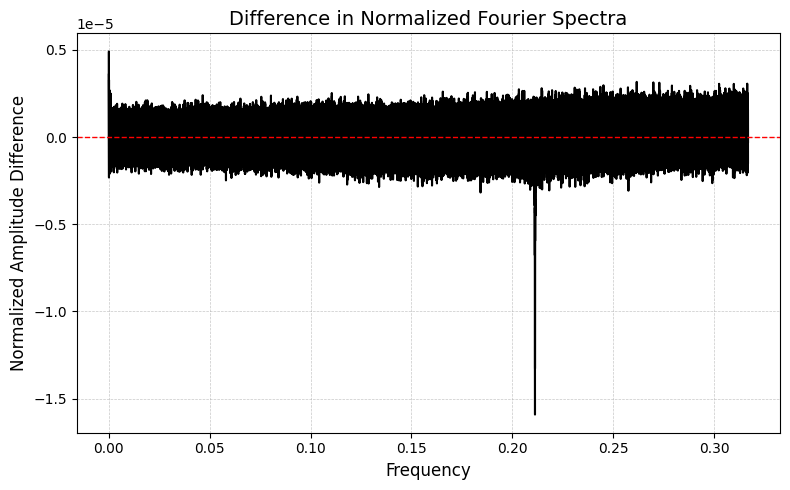

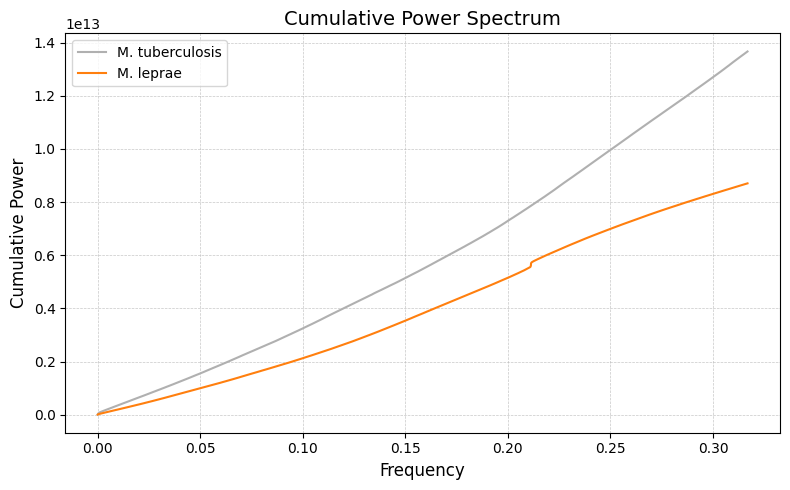

In [72]:
import numpy as np
import matplotlib.pyplot as plt

def map_sequence_to_numeric(sequence):
    mapping = {'A': 1, 'T': -1, 'G': 2, 'C': -2}
    return np.array([mapping.get(base, 0) for base in sequence])

def fourier_transform(sequence):
    numerical_seq = map_sequence_to_numeric(sequence)
    spectrum = np.abs(np.fft.fft(numerical_seq))
    frequencies = np.fft.fftfreq(len(numerical_seq))
    return frequencies[:len(frequencies)//2], spectrum[:len(spectrum)//2]

tb_full_sequence = "".join([str(seq) for seq in tb_cds])
lep_full_sequence = "".join([str(seq) for seq in lep_cds])

tb_frequencies, tb_spectrum = fourier_transform(tb_full_sequence)
lep_frequencies, lep_spectrum = fourier_transform(lep_full_sequence)

min_length = min(len(tb_frequencies), len(lep_frequencies))
tb_frequencies_trimmed = tb_frequencies[:min_length]
lep_frequencies_trimmed = lep_frequencies[:min_length]
tb_spectrum_trimmed = tb_spectrum[:min_length]
lep_spectrum_trimmed = lep_spectrum[:min_length]

def plot_fourier_spectrum(frequencies, spectrum, title, color):
    plt.figure(figsize=(8, 5))
    plt.plot(frequencies, np.log10(spectrum + 1), color=color, linewidth=1.5)
    plt.fill_between(frequencies, np.log10(spectrum + 1), color=color, alpha=0.3)
    plt.title(title, fontsize=14)
    plt.xlabel("Frequency", fontsize=12)
    plt.ylabel("Log10 Amplitude", fontsize=12)
    plt.grid(linestyle="--", linewidth=0.5, alpha=0.7)
    plt.tight_layout()
    plt.show()

plot_fourier_spectrum(tb_frequencies_trimmed, tb_spectrum_trimmed, "Fourier Spectrum: M. tuberculosis (Whole Sequence)", "#B0B0B0")
plot_fourier_spectrum(lep_frequencies_trimmed, lep_spectrum_trimmed, "Fourier Spectrum: M. leprae (Whole Sequence)", "#FF7F0E")

plt.figure(figsize=(8, 5))
difference_spectrum = np.log10(tb_spectrum_trimmed + 1) - np.log10(lep_spectrum_trimmed + 1)
plt.plot(tb_frequencies_trimmed, difference_spectrum, color="black", linewidth=1.5)
plt.axhline(0, color="red", linestyle="--", linewidth=1)
plt.title("Difference in Fourier Spectra", fontsize=14)
plt.xlabel("Frequency", fontsize=12)
plt.ylabel("Log10 Amplitude Difference", fontsize=12)
plt.grid(linestyle="--", linewidth=0.5, alpha=0.7)
plt.tight_layout()
plt.show()

tb_power_spectrum = tb_spectrum_trimmed ** 2
lep_power_spectrum = lep_spectrum_trimmed ** 2

plt.figure(figsize=(8, 5))
plt.plot(tb_frequencies_trimmed, np.log10(tb_power_spectrum + 1), label="M. tuberculosis", color="#B0B0B0", linewidth=1.5)
plt.plot(tb_frequencies_trimmed, np.log10(lep_power_spectrum + 1), label="M. leprae", color="#FF7F0E", linewidth=1.5)
plt.title("Power Spectrum Comparison", fontsize=14)
plt.xlabel("Frequency", fontsize=12)
plt.ylabel("Log10 Power", fontsize=12)
plt.legend(fontsize=10)
plt.grid(linestyle="--", linewidth=0.5, alpha=0.7)
plt.tight_layout()
plt.show()

def calculate_band_power(frequencies, power_spectrum, bands):
    band_powers = []
    for lower, upper in bands:
        indices = (frequencies >= lower) & (frequencies < upper)
        total_power = np.sum(power_spectrum[indices])
        band_powers.append(total_power)
    return band_powers

bands = [(0.0, 0.1), (0.1, 0.3), (0.3, 0.5)]
tb_band_powers = calculate_band_power(tb_frequencies_trimmed, tb_power_spectrum, bands)
lep_band_powers = calculate_band_power(lep_frequencies_trimmed, lep_power_spectrum, bands)

band_labels = ["Low (0.0-0.1)", "Mid (0.1-0.3)", "High (0.3-0.5)"]
x = np.arange(len(band_labels))
width = 0.35

plt.figure(figsize=(8, 5))
plt.bar(x - width/2, tb_band_powers, width, label="M. tuberculosis", color="#B0B0B0", edgecolor="black")
plt.bar(x + width/2, lep_band_powers, width, label="M. leprae", color="#FF7F0E", edgecolor="black")
plt.title("Power Distribution Across Frequency Bands", fontsize=14)
plt.xlabel("Frequency Bands", fontsize=12)
plt.ylabel("Total Power", fontsize=12)
plt.xticks(x, band_labels, fontsize=10)
plt.legend(fontsize=10)
plt.grid(axis="y", linestyle="--", linewidth=0.5, alpha=0.7)
plt.tight_layout()
plt.show()

def map_sequence_to_numeric(sequence):
    mapping = {'A': 1, 'T': -1, 'G': 2, 'C': -2}
    return np.array([mapping.get(base, 0) for base in sequence])

def fourier_transform(sequence):
    numerical_seq = map_sequence_to_numeric(sequence)
    spectrum = np.abs(np.fft.fft(numerical_seq))
    frequencies = np.fft.fftfreq(len(numerical_seq))
    return frequencies[:len(frequencies)//2], spectrum[:len(spectrum)//2]

tb_full_sequence = "".join([str(seq) for seq in tb_cds])
lep_full_sequence = "".join([str(seq) for seq in lep_cds])

tb_frequencies, tb_spectrum = fourier_transform(tb_full_sequence)
lep_frequencies, lep_spectrum = fourier_transform(lep_full_sequence)

min_length = min(len(tb_frequencies), len(lep_frequencies))
tb_frequencies_trimmed = tb_frequencies[:min_length]
lep_frequencies_trimmed = lep_frequencies[:min_length]
tb_spectrum_trimmed = tb_spectrum[:min_length]
lep_spectrum_trimmed = lep_spectrum[:min_length]

tb_spectrum_normalized = tb_spectrum_trimmed / np.sum(tb_spectrum_trimmed)
lep_spectrum_normalized = lep_spectrum_trimmed / np.sum(lep_spectrum_trimmed)

def plot_fourier_spectrum(frequencies, spectrum, title, color):
    """
    Plot the Fourier spectrum for a genome.
    """
    plt.figure(figsize=(8, 5))
    plt.plot(frequencies, np.log10(spectrum + 1), color=color, linewidth=1.5)
    plt.fill_between(frequencies, np.log10(spectrum + 1), color=color, alpha=0.3)
    plt.title(title, fontsize=14)
    plt.xlabel("Frequency", fontsize=12)
    plt.ylabel("Log10 Amplitude", fontsize=12)
    plt.grid(linestyle="--", linewidth=0.5, alpha=0.7)
    plt.tight_layout()
    plt.show()

plot_fourier_spectrum(tb_frequencies_trimmed, tb_spectrum_normalized, "Fourier Spectrum: M. tuberculosis (Normalized)", "#B0B0B0")
plot_fourier_spectrum(lep_frequencies_trimmed, lep_spectrum_normalized, "Fourier Spectrum: M. leprae (Normalized)", "#FF7F0E")

plt.figure(figsize=(8, 5))
difference_spectrum = tb_spectrum_normalized - lep_spectrum_normalized
plt.plot(tb_frequencies_trimmed, difference_spectrum, color="black", linewidth=1.5)
plt.axhline(0, color="red", linestyle="--", linewidth=1)
plt.title("Difference in Normalized Fourier Spectra", fontsize=14)
plt.xlabel("Frequency", fontsize=12)
plt.ylabel("Normalized Amplitude Difference", fontsize=12)
plt.grid(linestyle="--", linewidth=0.5, alpha=0.7)
plt.tight_layout()
plt.show()

tb_power_spectrum = np.cumsum(tb_spectrum_trimmed ** 2)
lep_power_spectrum = np.cumsum(lep_spectrum_trimmed ** 2)

plt.figure(figsize=(8, 5))
plt.plot(tb_frequencies_trimmed, tb_power_spectrum, label="M. tuberculosis", color="#B0B0B0", linewidth=1.5)
plt.plot(tb_frequencies_trimmed, lep_power_spectrum, label="M. leprae", color="#FF7F0E", linewidth=1.5)
plt.title("Cumulative Power Spectrum", fontsize=14)
plt.xlabel("Frequency", fontsize=12)
plt.ylabel("Cumulative Power", fontsize=12)
plt.legend(fontsize=10)
plt.grid(linestyle="--", linewidth=0.5, alpha=0.7)
plt.tight_layout()
plt.show()


=== Global Alignment Between M. tuberculosis CDS 1 and M. leprae CDS 1 ===
-T-T--G-ACCG-AT-GACC------CCG-G---TT--C-AG-----G-------C-T--T---C--A---CC--A--C-AG-T--------G-T--GGAACGCG-GTCGTCTCCGAACTT-AACGGCGA--CC--CTA-AGGTTGACGACGGAC--CCAGC-AGTGAT-G-CTA--ATCTC--AG-CG-CTCCGCTGAC-C-CCTCAGCAAAGG-GCT-TGGCTCAA-TCTCG-TC-CAG-CCAT-TG-ACCATCG-TCGAGGGG-TTTGCTCTGTT-ATCCG-TGCCG-AGCAGCTTTGTCCAAAAC-GAAATC-GAG-CGC-CATCTG-CGGGC--C-CCGAT-T-ACCGAC-GCT-CTCAGCCGC-CGACTCGGACAT-CAGATCCA-A-CTCGGG-GTCCGC-ATCGCT-CCGCCGGCG---ACCGACG-A-AGCC--GACGACACTA--CCGTGCCGCCTTC--C-GAAAA--TCCTG-CTA-CC-AC-AT--CG-C-CAGACACC-ACA-ACCGACAACGA---CGAGATTGATGACAGCGCTGCGGC--ACGG-GGCGA-TAACCAGCACAG-TTG-GCCAAGT--TACTTCACCGAG-CGC-CCGCACA-ATACCGAT-TC--CGC-TAC-CGCTGGC-G-TAACCAGCCTTAACCGTCGC--T-ACACCTTT-GATA-CGTTCGTTATC-GGCGCC-TCC-AAC-CGGTTCGCGCAC-GCC-GCCGC-CTTG-GCGATC-GCA-GAAGCACCCG-CCCGC-GCT-TACAACCCCCTGTT-CATCT-GGGGCGAGTCC-GGTCTC-GGCAAGACACACCTG-C-TA---CACGCG-GCA-GGC-AACTATGC-C-CAACGGT--TGTT-CCCGGGA-ATGCGGGTCAAATATGTCTCCACCGAG--GAATTCACC

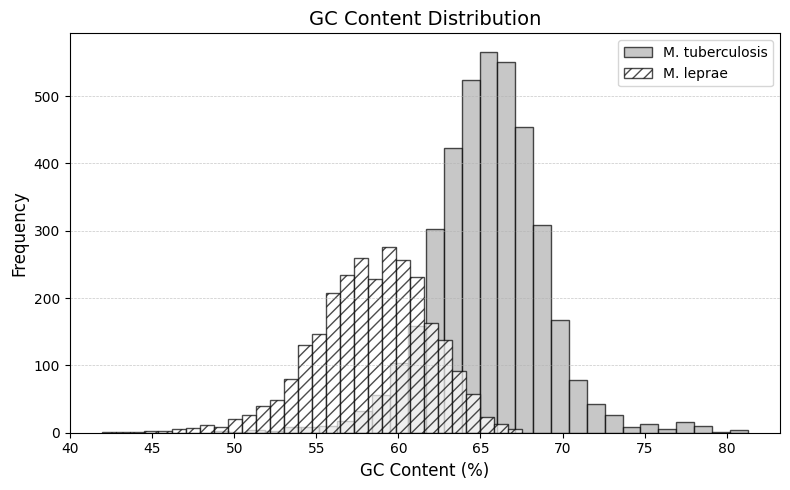


=== Amino Acid Frequencies in M. tuberculosis ===
A: 13.26%
C: 0.88%
D: 5.82%
E: 4.69%
F: 2.96%
G: 9.95%
H: 2.23%
I: 4.27%
K: 2.04%
L: 9.78%
M: 1.85%
N: 2.52%
P: 5.81%
Q: 3.09%
R: 7.31%
S: 5.48%
T: 5.93%
V: 8.59%
W: 1.46%
Y: 2.07%



/usr/local/lib/python3.10/dist-packages/Bio/Seq.py:2879: BiopythonWarning: Partial codon, len(sequence) not a multiple of three. Explicitly trim the sequence or add trailing N before translation. This may become an error in future.
  warnings.warn(



=== Amino Acid Frequencies in M. leprae ===
A: 11.56%
C: 1.09%
D: 5.79%
E: 4.94%
F: 2.99%
G: 8.33%
H: 2.29%
I: 4.82%
K: 2.64%
L: 10.04%
M: 1.97%
N: 2.67%
P: 5.41%
Q: 3.28%
R: 7.08%
S: 6.11%
T: 6.15%
V: 9.13%
W: 1.43%
Y: 2.25%



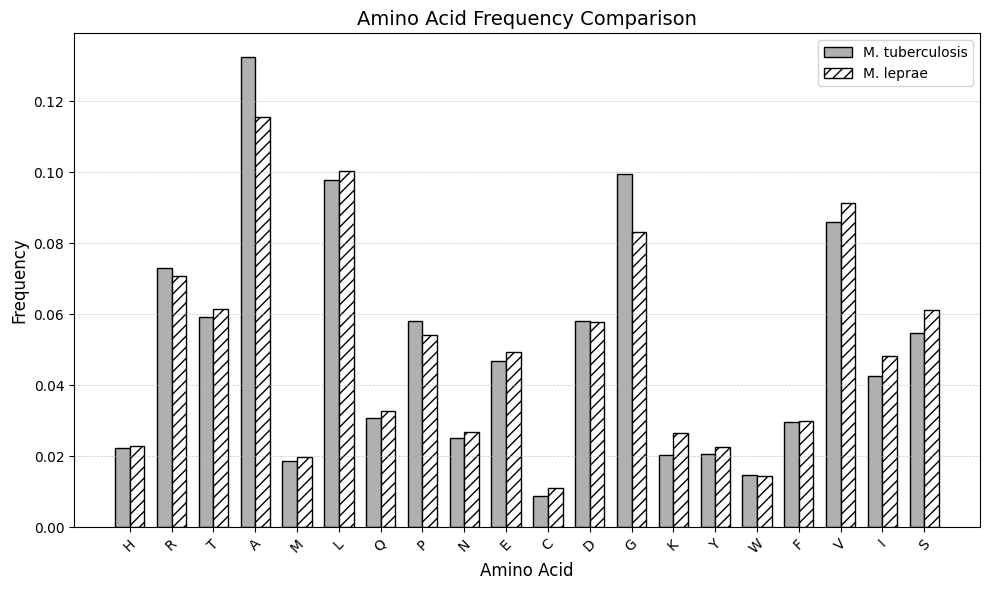

In [55]:
from Bio import pairwise2
from Bio.Seq import Seq
from collections import Counter
import numpy as np
import matplotlib.pyplot as plt

def align_sequences(seq1, seq2, description1="Sequence 1", description2="Sequence 2"):
    alignments = pairwise2.align.globalxx(seq1, seq2)
    print(f"\n=== Global Alignment Between {description1} and {description2} ===")
    print(pairwise2.format_alignment(*alignments[0]))

align_sequences(str(tb_cds[0]), str(lep_cds[0]), "M. tuberculosis CDS 1", "M. leprae CDS 1")

def discover_motifs_variable_length(coding_sequences, k=6):
    kmer_counter = Counter()
    for seq in coding_sequences:
        seq_str = str(seq)
        for i in range(len(seq_str) - k + 1):
            kmer = seq_str[i:i + k]
            kmer_counter[kmer] += 1
    return kmer_counter.most_common(10)

tb_top_motifs = discover_motifs_variable_length(tb_cds[:50], k=6)
lep_top_motifs = discover_motifs_variable_length(lep_cds[:50], k=6)

print("\n=== Top Motifs in M. tuberculosis ===")
for motif, count in tb_top_motifs:
    print(f"Motif: {motif}, Count: {count}")

print("\n=== Top Motifs in M. leprae ===")
for motif, count in lep_top_motifs:
    print(f"Motif: {motif}, Count: {count}")

def calculate_gc_content(sequence):
    gc_count = sequence.count("G") + sequence.count("C")
    return (gc_count / len(sequence)) * 100 if len(sequence) > 0 else 0

def gc_content_distribution(coding_sequences, species_name):
    gc_contents = [calculate_gc_content(seq) for seq in coding_sequences]
    print(f"\n=== GC Content in {species_name} ===")
    print(f"Mean: {np.mean(gc_contents):.2f}%")
    print(f"Median: {np.median(gc_contents):.2f}%")
    print(f"Standard Deviation: {np.std(gc_contents):.2f}%")
    return gc_contents

tb_gc_distribution = gc_content_distribution(tb_cds, "M. tuberculosis")
lep_gc_distribution = gc_content_distribution(lep_cds, "M. leprae")

plt.figure(figsize=(8, 5))

plt.hist(tb_gc_distribution, bins=30, alpha=0.7, label="M. tuberculosis", color="#B0B0B0", edgecolor="black")

plt.hist(
    lep_gc_distribution,
    bins=30,
    alpha=0.7,
    label="M. leprae",
    color="white",
    edgecolor="black",
    hatch="///"
)

plt.title("GC Content Distribution", fontsize=14)
plt.xlabel("GC Content (%)", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.legend(fontsize=10)
plt.grid(axis="y", linestyle="--", linewidth=0.5, alpha=0.7)
plt.tight_layout()
plt.show()

def amino_acid_frequencies(coding_sequences, species_name):
    aa_counter = Counter()
    for seq in coding_sequences:
        aa_seq = Seq(str(seq)).translate(to_stop=True)
        aa_counter.update(str(aa_seq))
    total_aa = sum(aa_counter.values())
    aa_frequencies = {aa: count / total_aa for aa, count in aa_counter.items()}
    print(f"\n=== Amino Acid Frequencies in {species_name} ===")
    for aa, freq in sorted(aa_frequencies.items()):
        print(f"{aa}: {freq:.2%}")
    print()
    return aa_frequencies

tb_aa_frequencies = amino_acid_frequencies(tb_cds, "M. tuberculosis")
lep_aa_frequencies = amino_acid_frequencies(lep_cds, "M. leprae")

aa_labels = list(set(tb_aa_frequencies.keys()).union(lep_aa_frequencies.keys()))
tb_aa_values = [tb_aa_frequencies.get(aa, 0) for aa in aa_labels]
lep_aa_values = [lep_aa_frequencies.get(aa, 0) for aa in aa_labels]

x = np.arange(len(aa_labels))
width = 0.35

fig, ax = plt.subplots(figsize=(10, 6))

rects1 = ax.bar(
    x - width/2, tb_aa_values, width,
    label="M. tuberculosis",
    color="#B0B0B0",
    edgecolor="black"
)

rects2 = ax.bar(
    x + width/2, lep_aa_values, width,
    label="M. leprae",
    color="white",
    edgecolor="black",
    hatch="///"
)

ax.set_xlabel("Amino Acid", fontsize=12)
ax.set_ylabel("Frequency", fontsize=12)
ax.set_title("Amino Acid Frequency Comparison", fontsize=14)
ax.set_xticks(x)
ax.set_xticklabels(aa_labels, fontsize=10, rotation=45)
ax.legend(fontsize=10)

ax.grid(axis="y", linestyle="--", linewidth=0.5, alpha=0.7)

plt.tight_layout()
plt.show()

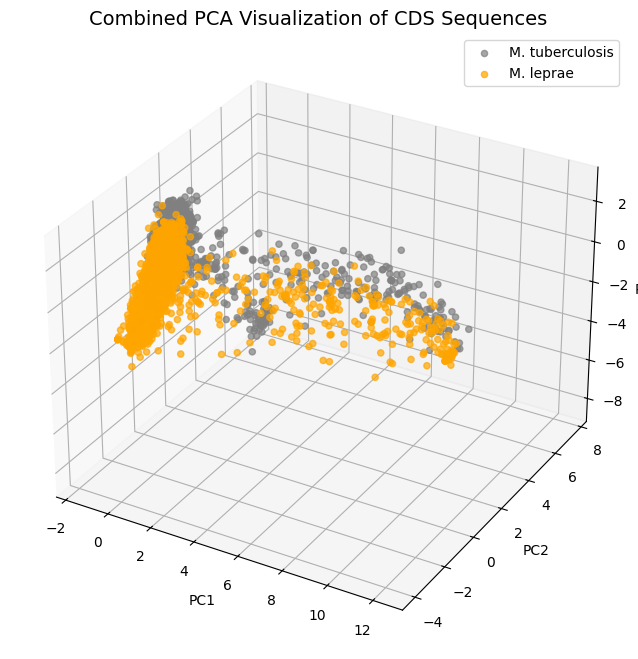

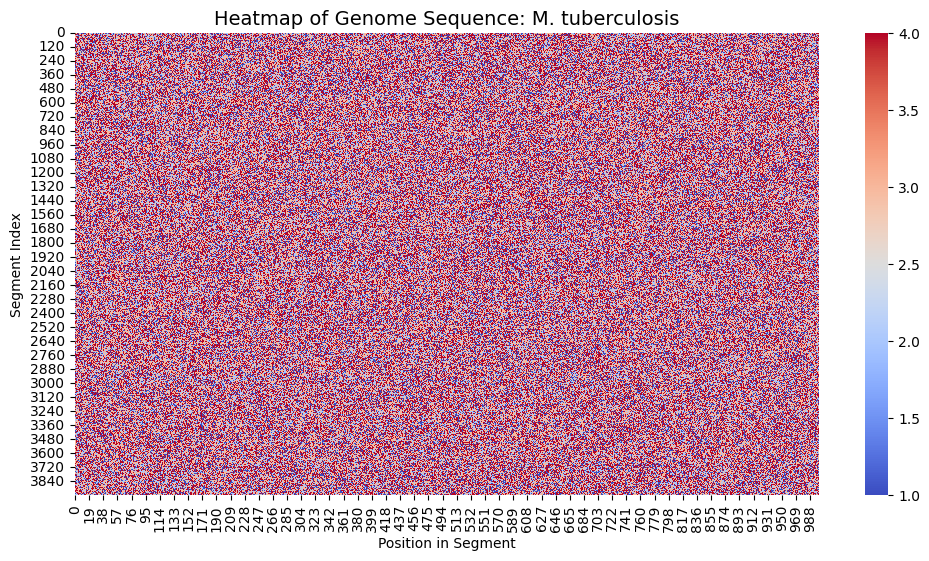

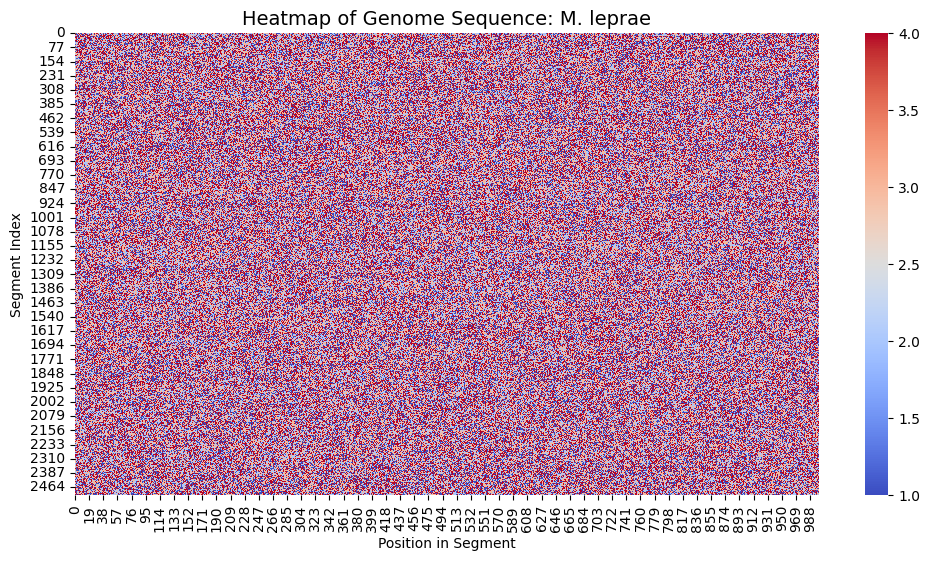

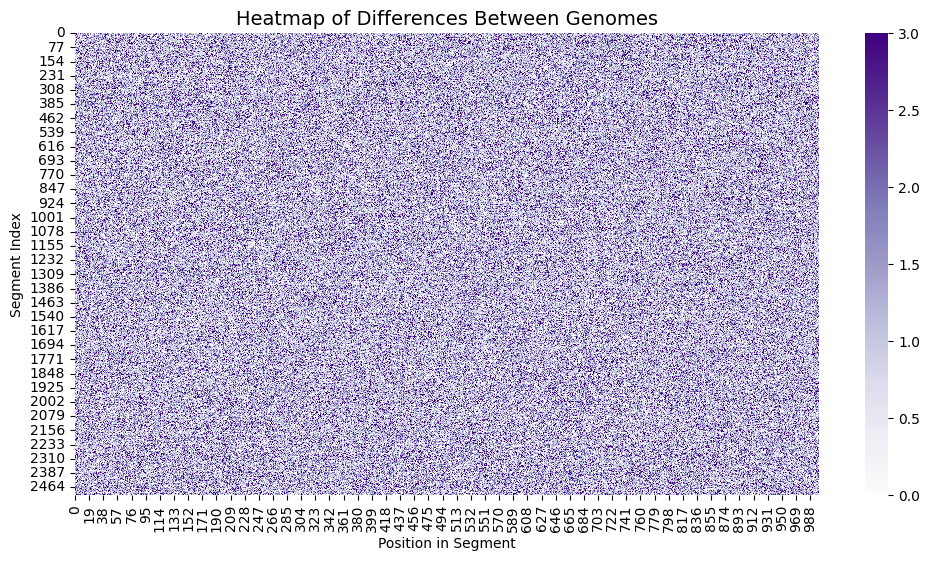

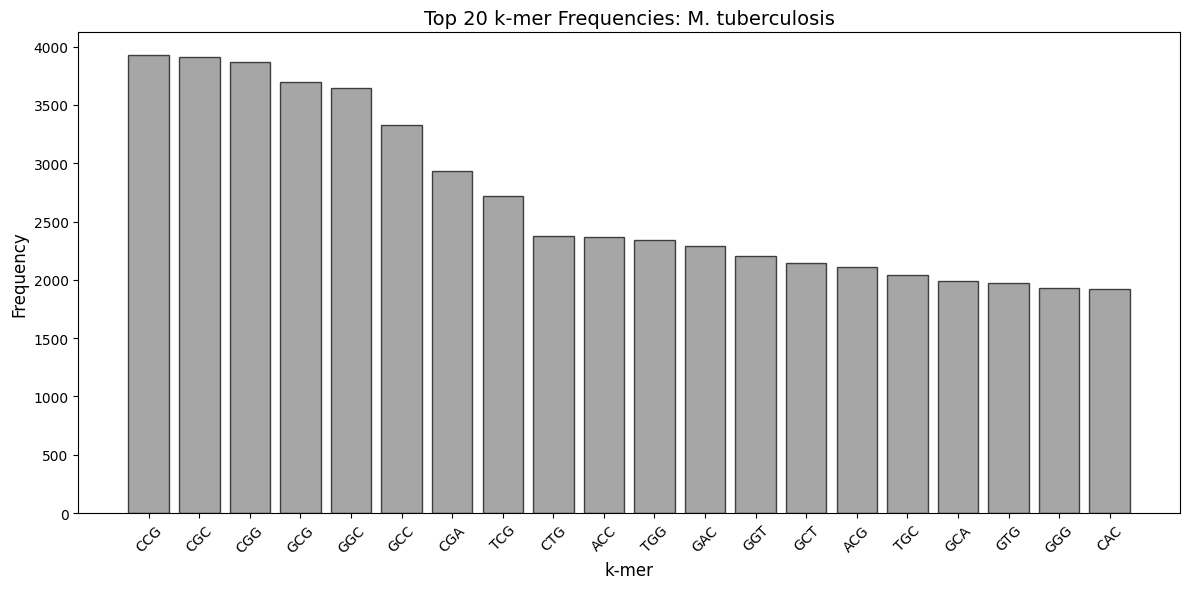

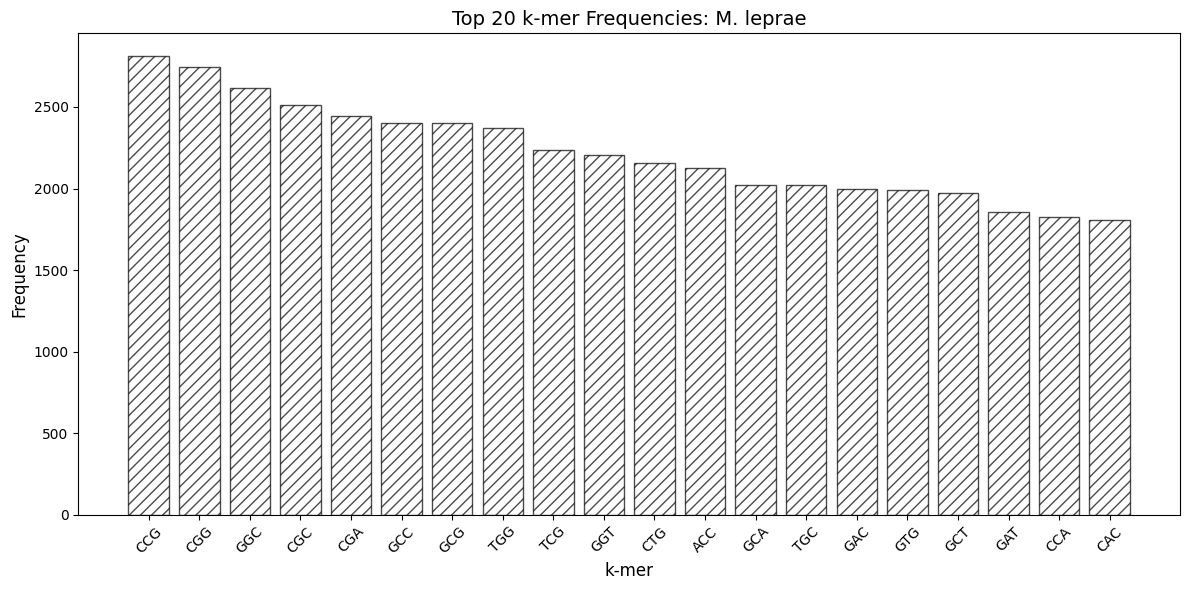

In [70]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import OneHotEncoder
import numpy as np
import matplotlib.pyplot as plt

def perform_combined_pca_and_plot(tb_cds, lep_cds, fixed_length=300):
    """
    Perform PCA on combined CDS sequences of two species and plot in 3D.
    :param tb_cds: List of CDS sequences for M. tuberculosis.
    :param lep_cds: List of CDS sequences for M. leprae.
    :param fixed_length: Fixed length to pad/truncate CDS sequences.
    """
    def pad_or_truncate(sequence, length):
        if len(sequence) < length:
            return sequence + "N" * (length - len(sequence))
        else:
            return sequence[:length]

    tb_fixed = [pad_or_truncate(str(seq), fixed_length) for seq in tb_cds]
    lep_fixed = [pad_or_truncate(str(seq), fixed_length) for seq in lep_cds]

    combined_sequences = tb_fixed + lep_fixed
    labels = ["M. tuberculosis"] * len(tb_fixed) + ["M. leprae"] * len(lep_fixed)

    encoder = OneHotEncoder(categories=[["A", "T", "G", "C", "N"]], sparse_output=False, handle_unknown="ignore")
    encoded_sequences = [
        encoder.fit_transform(np.array(list(seq)).reshape(-1, 1)).ravel()
        for seq in combined_sequences
    ]
    encoded_array = np.array(encoded_sequences)

    pca = PCA(n_components=3)
    pca_result = pca.fit_transform(encoded_array)

    tb_pca = pca_result[:len(tb_fixed)]
    lep_pca = pca_result[len(tb_fixed):]

    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection="3d")
    ax.scatter(tb_pca[:, 0], tb_pca[:, 1], tb_pca[:, 2], c="grey", alpha=0.7, s=20, label="M. tuberculosis")
    ax.scatter(lep_pca[:, 0], lep_pca[:, 1], lep_pca[:, 2], c="orange", alpha=0.7, s=20, label="M. leprae")
    ax.set_title("Combined PCA Visualization of CDS Sequences", fontsize=14)
    ax.set_xlabel("PC1")
    ax.set_ylabel("PC2")
    ax.set_zlabel("PC3")
    ax.legend()
    plt.show()

perform_combined_pca_and_plot(tb_cds[:2700], lep_cds[:2700])

print()

def create_sequence_heatmap(sequence, species_name, segment_size=1000):
    """
    Creates a heatmap representation of the entire sequence.
    :param sequence: Full genome sequence (string).
    :param species_name: Name of the species for labeling.
    :param segment_size: Size of the genomic segments for heatmap granularity.
    """
    mapping = {"A": 1, "T": 2, "G": 3, "C": 4}
    mapped_sequence = np.array([mapping.get(base, 0) for base in sequence])

    num_segments = len(mapped_sequence) // segment_size
    heatmap_data = mapped_sequence[:num_segments * segment_size].reshape(-1, segment_size)

    plt.figure(figsize=(12, 6))
    sns.heatmap(heatmap_data, cmap="coolwarm", cbar=True)
    plt.title(f"Heatmap of Genome Sequence: {species_name}", fontsize=14)
    plt.xlabel("Position in Segment")
    plt.ylabel("Segment Index")
    plt.show()


def create_difference_heatmap(seq1, seq2, segment_size=1000):
    """
    Creates a heatmap of differences between two sequences.
    :param seq1: Full genome sequence of the first species.
    :param seq2: Full genome sequence of the second species.
    :param segment_size: Size of the genomic segments for heatmap granularity.
    """
    mapping = {"A": 1, "T": 2, "G": 3, "C": 4}
    mapped_seq1 = np.array([mapping.get(base, 0) for base in seq1])
    mapped_seq2 = np.array([mapping.get(base, 0) for base in seq2])

    min_length = min(len(mapped_seq1), len(mapped_seq2))
    mapped_seq1 = mapped_seq1[:min_length]
    mapped_seq2 = mapped_seq2[:min_length]

    difference = np.abs(mapped_seq1 - mapped_seq2)

    num_segments = len(difference) // segment_size
    difference_data = difference[:num_segments * segment_size].reshape(-1, segment_size)

    plt.figure(figsize=(12, 6))
    sns.heatmap(difference_data, cmap="Purples", cbar=True)
    plt.title("Heatmap of Differences Between Genomes", fontsize=14)
    plt.xlabel("Position in Segment")
    plt.ylabel("Segment Index")
    plt.show()

create_sequence_heatmap(tb_full_sequence, "M. tuberculosis", segment_size=1000)
print()

create_sequence_heatmap(lep_full_sequence, "M. leprae", segment_size=1000)
print()

create_difference_heatmap(tb_full_sequence, lep_full_sequence, segment_size=1000)
print()

def calculate_kmer_frequencies(sequence, k=3):
    """
    Calculate k-mer frequencies for a given sequence.
    :param sequence: DNA sequence.
    :param k: Length of k-mer.
    :return: Dictionary of k-mer frequencies.
    """
    kmer_counts = {}
    for i in range(len(sequence) - k + 1):
        kmer = sequence[i:i + k]
        kmer_counts[kmer] = kmer_counts.get(kmer, 0) + 1
    return kmer_counts

def plot_kmer_frequencies(kmer_frequencies, species_name, color="grey", hatch=None):
    """
    Plot the k-mer frequency distribution as a bar chart in a professional color scheme.
    :param kmer_frequencies: Dictionary of k-mer frequencies.
    :param species_name: Name of the species for labeling.
    :param color: Bar color (default is grey for M. tuberculosis).
    :param hatch: Optional hatch pattern (used for M. leprae).
    """
    sorted_kmers = sorted(kmer_frequencies.items(), key=lambda x: x[1], reverse=True)
    kmers, counts = zip(*sorted_kmers[:20])

    plt.figure(figsize=(12, 6))
    bars = plt.bar(
        kmers, counts, color=color, alpha=0.7, edgecolor="black", hatch=hatch
    )
    plt.title(f"Top 20 k-mer Frequencies: {species_name}", fontsize=14)
    plt.xlabel("k-mer", fontsize=12)
    plt.ylabel("Frequency", fontsize=12)
    plt.xticks(rotation=45, fontsize=10)
    plt.tight_layout()
    plt.show()


tb_kmer_frequencies = calculate_kmer_frequencies(tb_full_sequence[:100000], k=3)
lep_kmer_frequencies = calculate_kmer_frequencies(lep_full_sequence[:100000], k=3)

plot_kmer_frequencies(tb_kmer_frequencies, "M. tuberculosis", color="grey")
print()

plot_kmer_frequencies(
    lep_kmer_frequencies, "M. leprae", color="white", hatch="///"
)

------
------